## This is a demo to download DEM of a given coordinate box from MML database and delineate catchments

In [1]:
# modules
from tools import dem_from_mml, delineate_catchment_from_dem, fill_cmask_holes
import pandas as pd
import numpy as np

# inputs parameters
#subset = [370000,7537500,390000,7557500] # coordinate box of the dem, PALLAS
subset = [350000,6857000,360000,6865000] # coordinate box of the dem, KUIVAJARVI

apifile = r'/Users/jpnousu/SpaFHy_GISPUTS/apikey.txt' # api-key for MML database (registration needed)
apikey = np.loadtxt(apifile, dtype='str') # api-key loaded from a txt-file

# reading stream outlet file
streams_file = '/Users/jpnousu/Documents/Kuivalake_Catchment/stream_outlets.csv'
streams = pd.read_csv(streams_file, sep=';', usecols=['stream'], encoding = "ISO-8859-1")['stream'].to_list()

# output path
outpath = r'/Users/jpnousu/Documents/Kuivalake_Catchment/GIS_inputs'

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


#### Downloading DEM subset from MML database

In [ ]:
dem, out_fp = dem_from_mml(outpath, 
                           subset, 
                           apikey=apikey)

#### Delineating multiple catchments as defined in stream_outlets.csv file 


*** Delineating kuivajarvi catchment ***
*** kuivajarvi catchment is delineated and DEM derivatives are saved ***

*** Delineating kuivajarvenoja catchment ***
*** kuivajarvenoja catchment is delineated and DEM derivatives are saved ***

*** Delineating S1 catchment ***
*** S1 catchment is delineated and DEM derivatives are saved ***

*** Delineating S2 catchment ***
*** S2 catchment is delineated and DEM derivatives are saved ***

*** Delineating S3 catchment ***
*** S3 catchment is delineated and DEM derivatives are saved ***

*** Delineating S4 catchment ***
*** S4 catchment is delineated and DEM derivatives are saved ***

*** Delineating S5 catchment ***
*** S5 catchment is delineated and DEM derivatives are saved ***

*** Delineating S6 catchment ***
*** S6 catchment is delineated and DEM derivatives are saved ***

*** Delineating S7 catchment ***
*** S7 catchment is delineated and DEM derivatives are saved ***

*** Delineating S8 catchment ***
*** S8 catchment is delineated and 

IndexError: index 0 is out of bounds for axis 0 with size 0

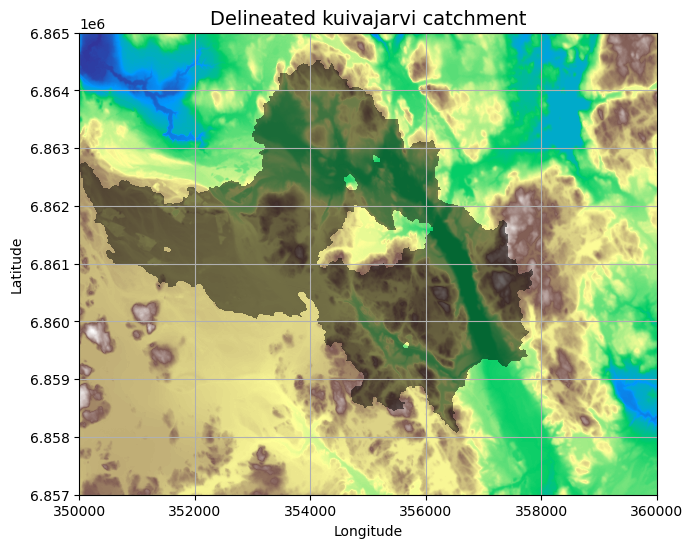

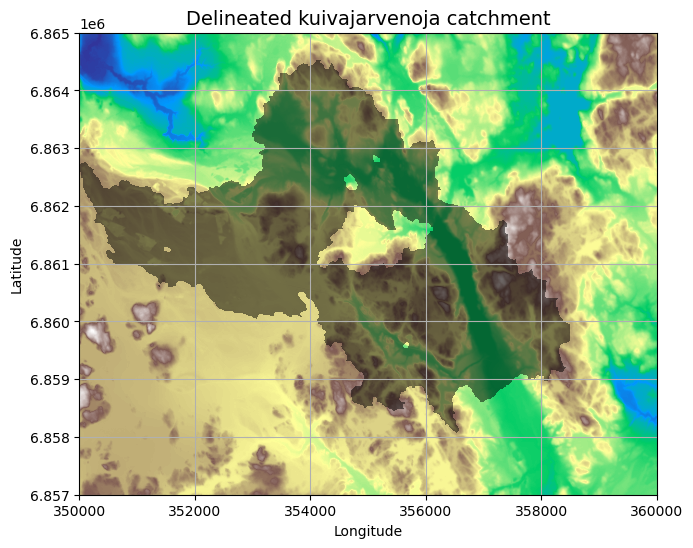

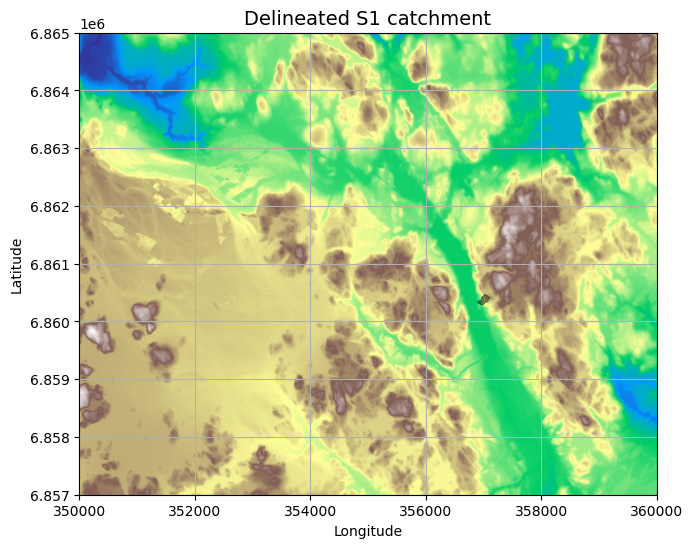

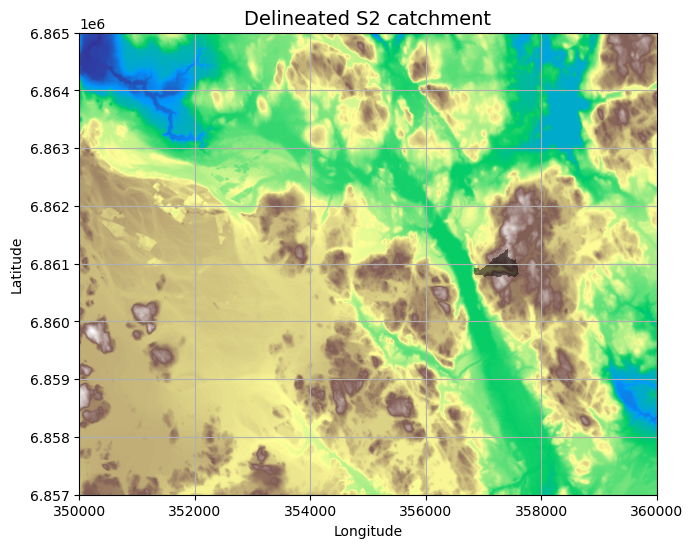

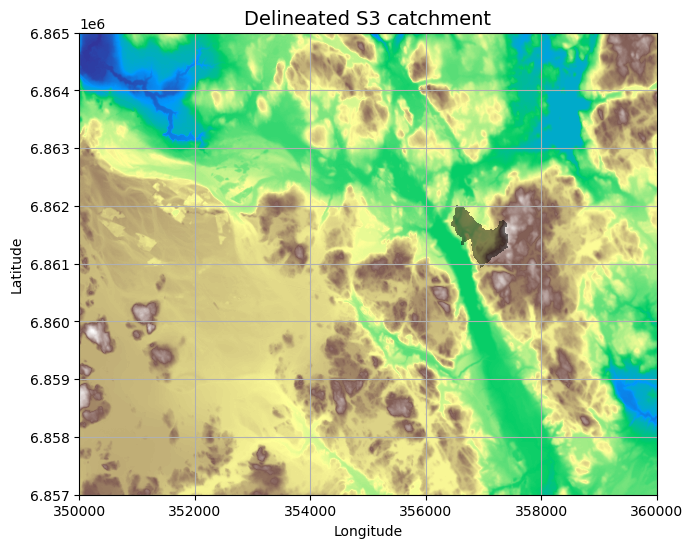

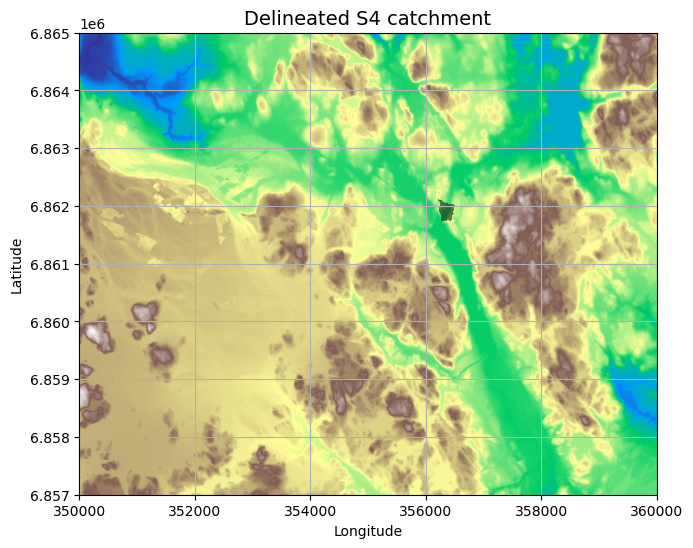

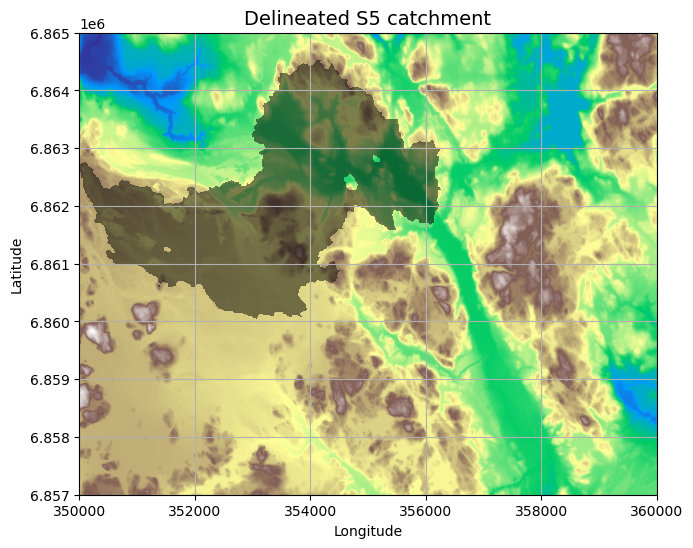

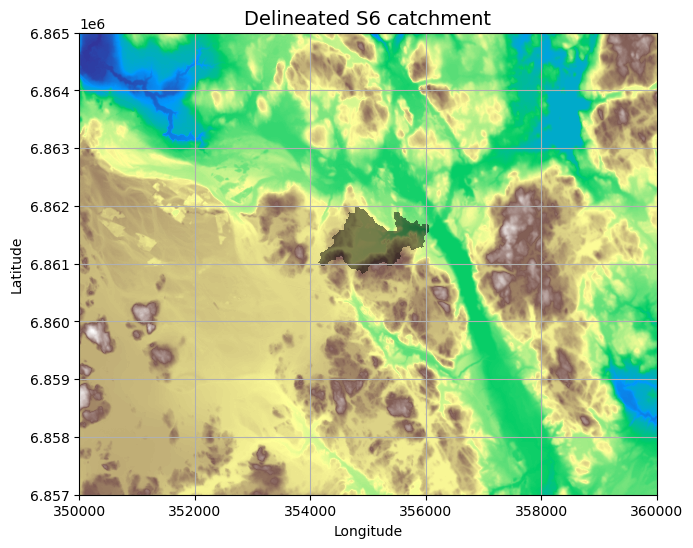

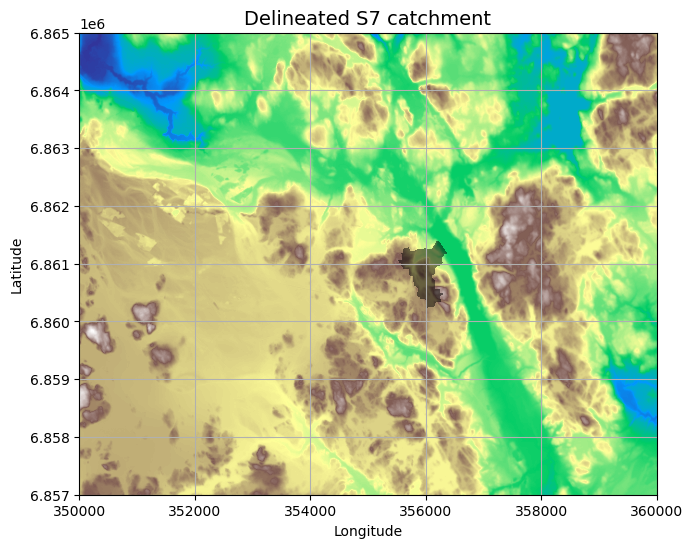

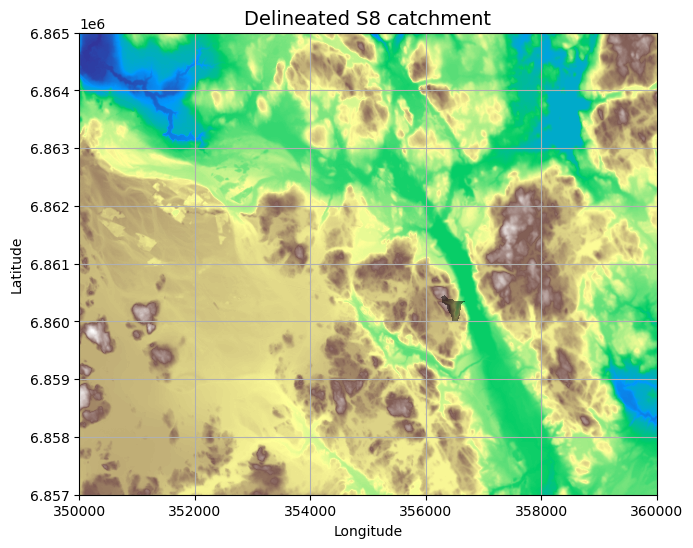

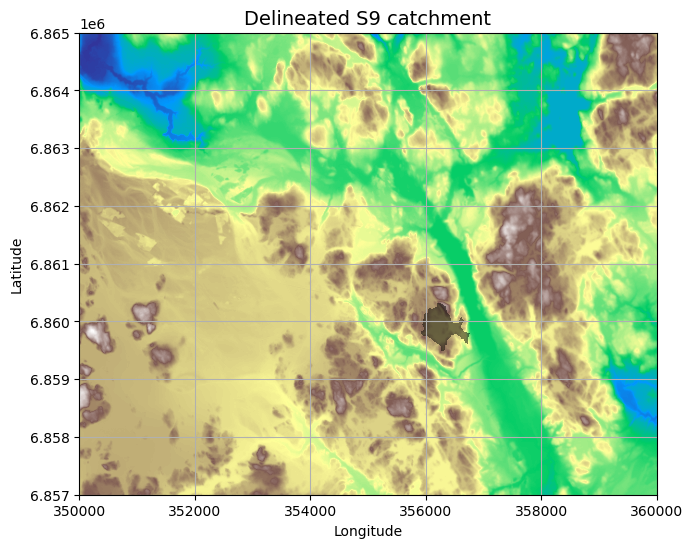

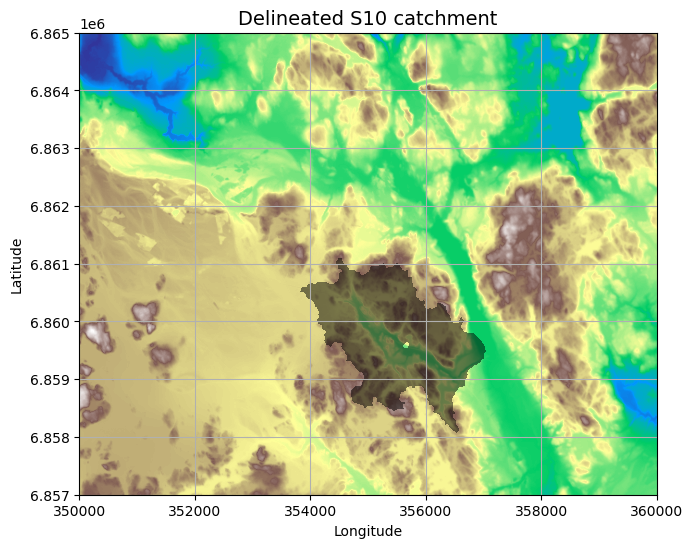

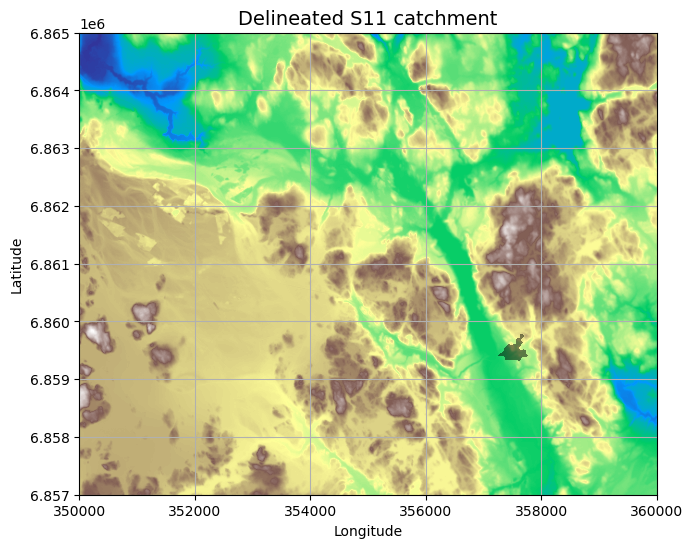

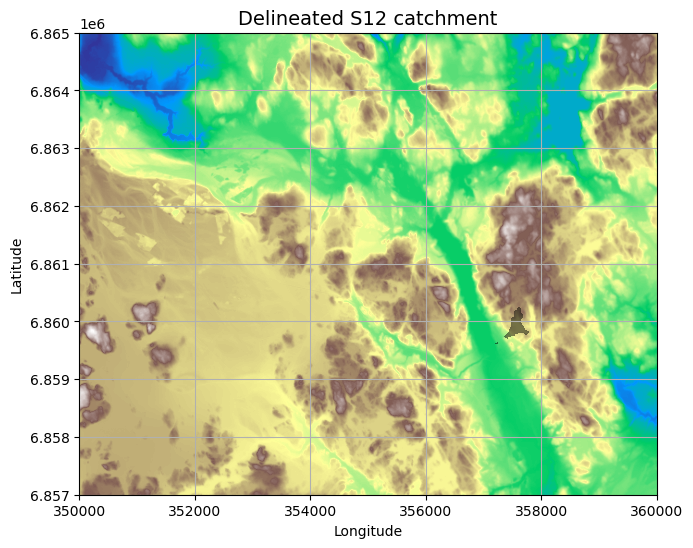

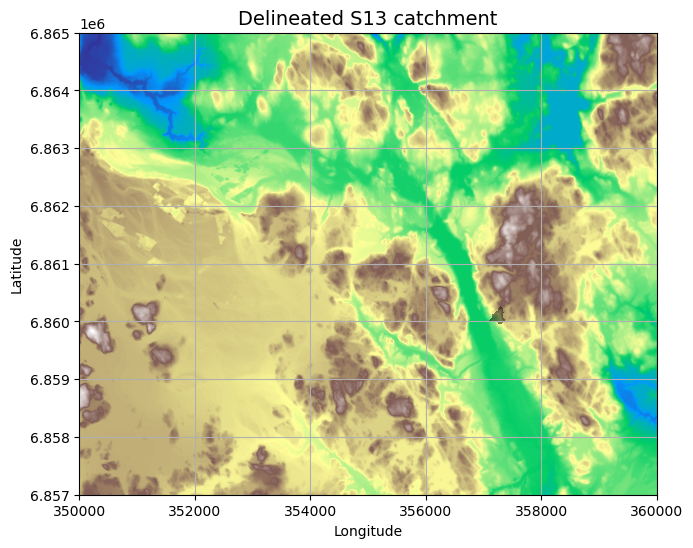

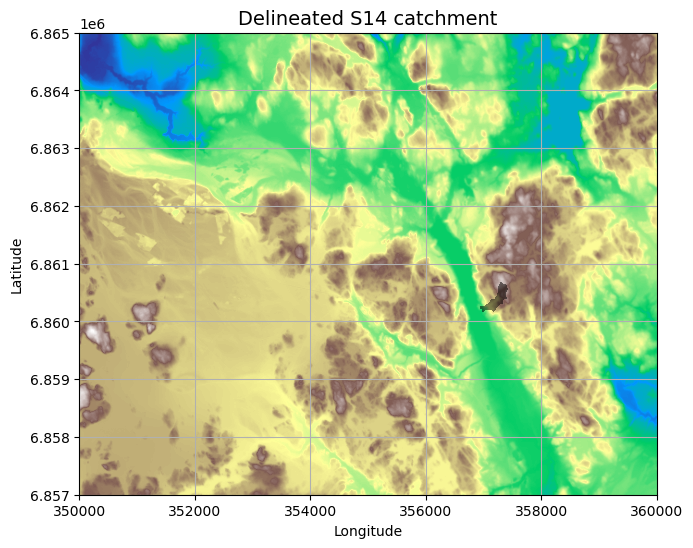

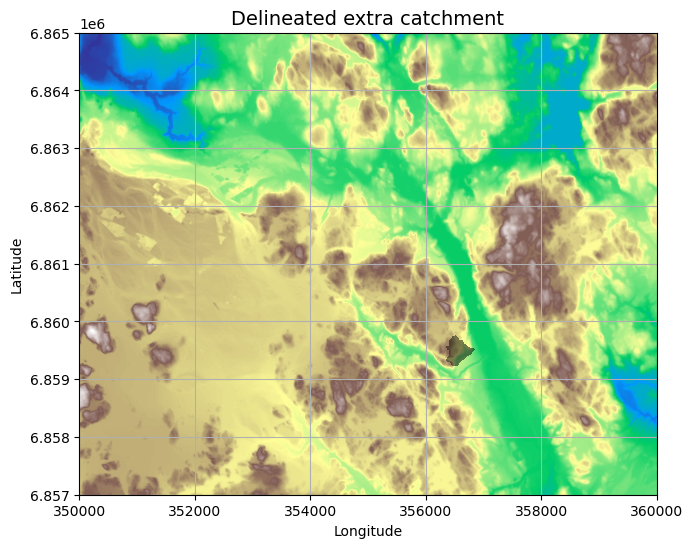

In [2]:
# loop catchment test
out_fp = r'/Users/jpnousu/Documents/Kuivalake_Catchment/GIS_inputs/korkeusmalli_16m.tif'
for catchment_name in streams:
    delineate_catchment_from_dem(dem_path=out_fp,
                             catchment_name=catchment_name,
                             outfolder=outpath,
                             outlet_file=streams_file,
                             clip_catchment=True,
                             snap=True)

#### Let's fill possible holes in catchments masks

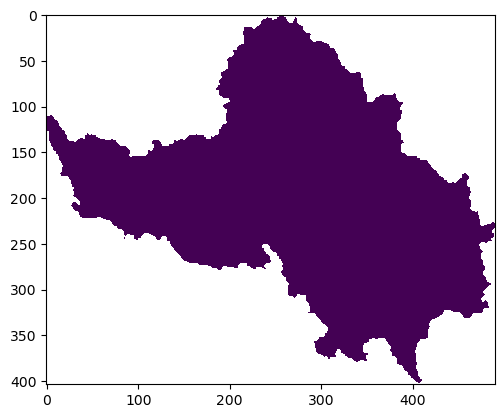

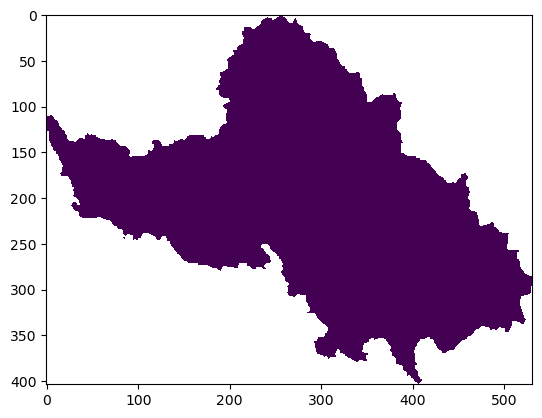

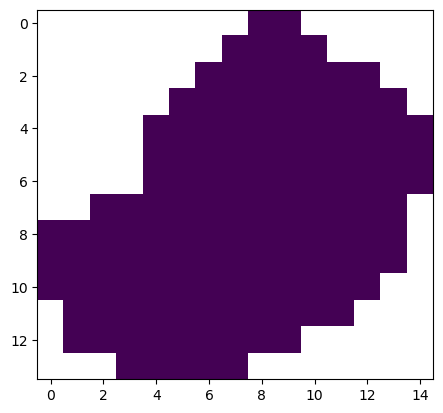

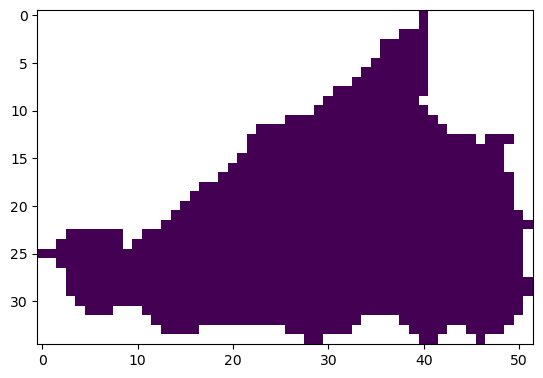

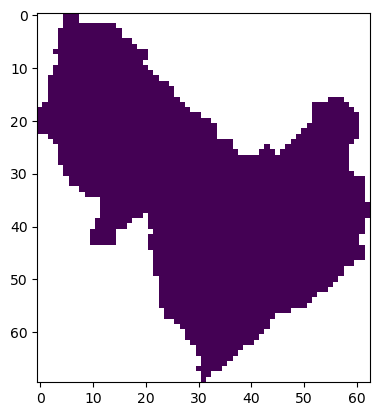

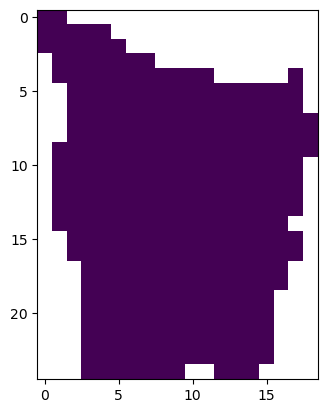

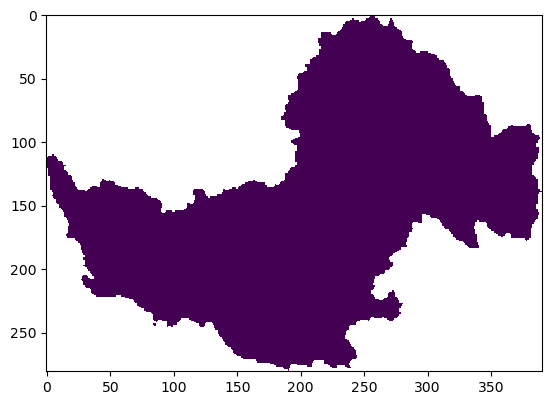

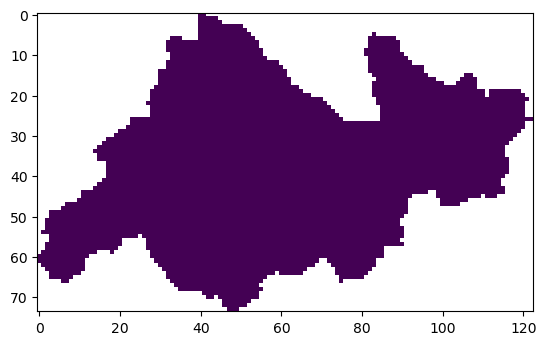

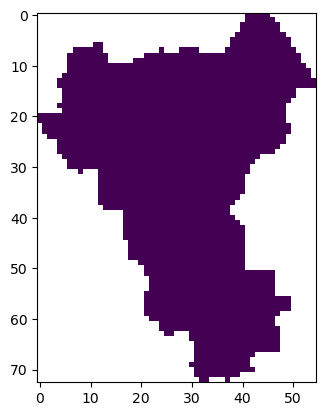

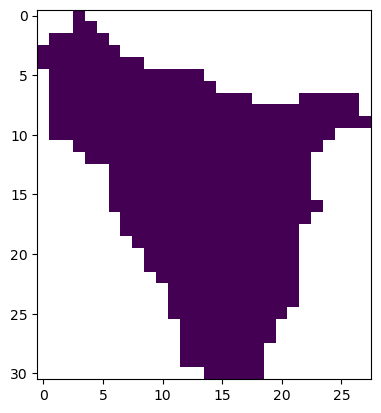

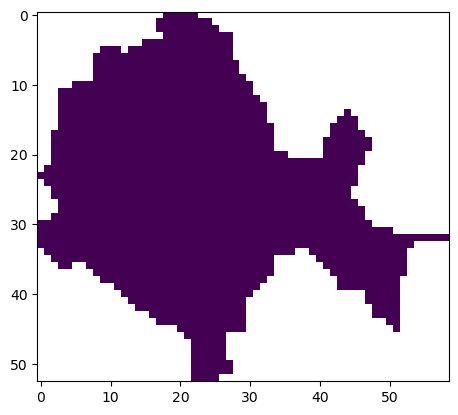

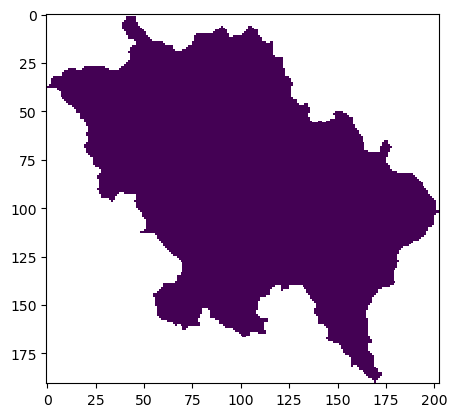

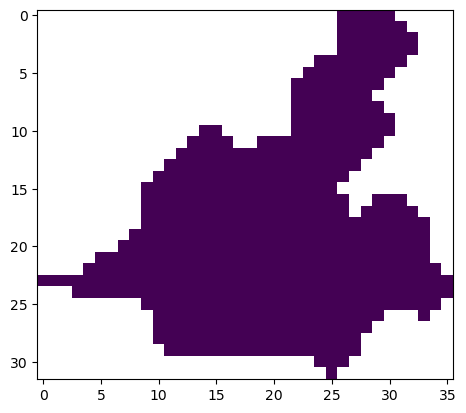

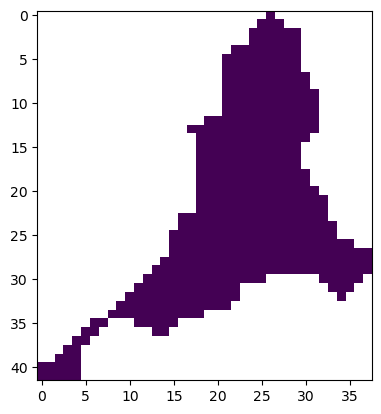

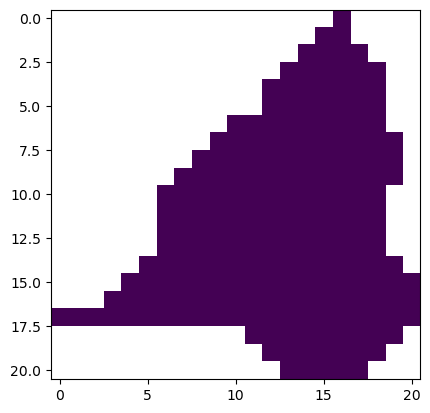

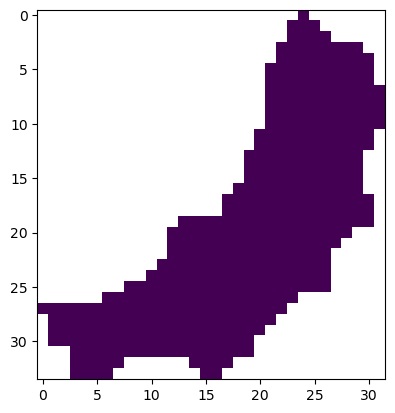

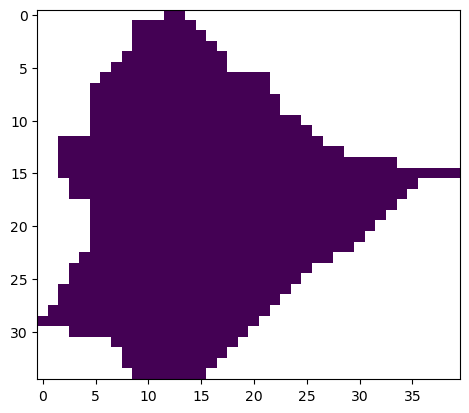

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jpnousu/Documents/Kuivalake_Catchment/GIS_inputs/nan/cmask_d8_nan.asc'

In [2]:
for catchment_name in streams:
    fn = f'/Users/jpnousu/Documents/Kuivalake_Catchment/GIS_inputs/{catchment_name}/cmask_d8_{catchment_name}.asc'
    fill_cmask_holes(fn)